Hunter Bennett  
Glass Lab  
Created 171207 | Last updated 171207 
____________  
Goal is to compare the results of the CCl4 and AMLN diet RNA Seq analysis using DESeq2.  
AMLN analysis: /liverStrains/results/171205_RNASeq_Strains.ipynb  
CCL4 analysis: /liverStrains/results/171207_RNASeq_Strains_CCl4.ipynb

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import subprocess
import os
import sys
import glob
import re

# import user defined packages
sys.path.insert(0, '/home/h1bennet/scripts')
import hbUtils

# plot matplotlib plots in notebook
%matplotlib inline


In [8]:
# set paths to the prior analyses
amln_dir='/home/h1bennet/liverStrains/results/171205_RNA_Seq/'
ccl4_dir='/home/h1bennet/liverStrains/results/171207_RNA_Seq_CCl4/'

In [15]:
aj_amln_diet = pd.read_csv(amln_dir + "/aj_amln_deseq_results.txt")
aj_balb_amln = pd.read_csv(amln_dir + "/balbc_aj_amln_interaction_deseq_results.txt")
aj_ncor_amln = pd.read_csv(amln_dir + "/aj_ncorwt_amln_interaction_deseq_results.txt")
balb_amln_diet = pd.read_csv(amln_dir + "/balbc_amln_deseq_results.txt")
balb_aj_amln = pd.read_csv(amln_dir + "/balbc_aj_amln_interaction_deseq_results.txt")
balb_ncor_amln = pd.read_csv(amln_dir + "/balbc_ncorwt_amln_interaction_deseq_results.txt")
ncorwt_amln_diet = pd.read_csv(amln_dir + "/ncorwt_amln_deseq_results.txt")
ncorwt_aj_amln = pd.read_csv(amln_dir + "/aj_ncorwt_amln_interaction_deseq_results.txt")
ncorwt_balb_amln = pd.read_csv(amln_dir + "/balbc_ncorwt_amln_interaction_deseq_results.txt")

In [32]:
aj_amln = aj_amln_diet.merge(aj_balb_amln.merge(aj_ncor_amln, how='outer', on='Unnamed: 0',
                                    suffixes=('_aj_balb', '_aj_ncor')),
                      how='outer', on='Unnamed: 0')

balb_amln = balb_amln_diet.merge(balb_aj_amln.merge(aj_ncor_amln, how='outer', on='Unnamed: 0',
                                    suffixes=('_balb_aj', '_balb_ncor')),
                      how='outer', on='Unnamed: 0')

ncorwt_amln = ncorwt_amln_diet.merge(ncorwt_aj_amln.merge(ncorwt_balb_amln, how='outer', on='Unnamed: 0',
                                    suffixes=('_ncorwt_aj', '_ncorwt_balb')),
                      how='outer', on='Unnamed: 0')

In [24]:
aj_ccl4_diet = pd.read_csv(ccl4_dir + "/aj_ccl4_deseq_results.txt")
aj_balb_ccl4 = pd.read_csv(ccl4_dir + "/balbc_aj_ccl4_interaction_deseq_results.txt")
aj_ncor_ccl4 = pd.read_csv(ccl4_dir + "/aj_ncorwt_ccl4_interaction_deseq_results.txt")
balb_ccl4_diet = pd.read_csv(ccl4_dir + "/balbc_ccl4_deseq_results.txt")
balb_aj_ccl4 = pd.read_csv(ccl4_dir + "/balbc_aj_ccl4_interaction_deseq_results.txt")
balb_ncor_ccl4 = pd.read_csv(ccl4_dir + "/balbc_ncorwt_ccl4_interaction_deseq_results.txt")
ncorwt_ccl4_diet = pd.read_csv(ccl4_dir + "/ncorwt_ccl4_deseq_results.txt")
ncorwt_aj_ccl4 = pd.read_csv(ccl4_dir + "/aj_ncorwt_ccl4_interaction_deseq_results.txt")
ncorwt_balb_ccl4 = pd.read_csv(ccl4_dir + "/balbc_ncorwt_ccl4_interaction_deseq_results.txt")

In [33]:
aj_ccl4= aj_ccl4_diet.merge(aj_balb_ccl4.merge(aj_ncor_ccl4, how='outer', on='Unnamed: 0',
                                    suffixes=('_aj_balb', '_aj_ncor')),
                      how='outer', on='Unnamed: 0')

balb_ccl4 = balb_ccl4_diet.merge(balb_aj_ccl4.merge(aj_ncor_ccl4, how='outer', on='Unnamed: 0',
                                    suffixes=('_balb_aj', '_balb_ncor')),
                      how='outer', on='Unnamed: 0')

ncorwt_ccl4 = ncorwt_ccl4_diet.merge(ncorwt_aj_ccl4.merge(ncorwt_balb_ccl4, how='outer', on='Unnamed: 0',
                                    suffixes=('_ncorwt_aj', '_ncorwt_balb')),
                      how='outer', on='Unnamed: 0')

In [138]:
def plot_pval_comp(amln, ccl4):
    
    df = amln.merge(ccl4, how='outer', on='Unnamed: 0', suffixes=('_amln', '_ccl4'))
    
    df_p = df.loc[:, list(pd.Series(df.columns).str.contains('padj'))]
    df_logp = -np.log10(df_p)
    
    # number of pvalues for subplot
    amln_p = df.columns[pd.Series(df.columns).str.contains('padj.*amln')]
    ccl4_p = df.columns[pd.Series(df.columns).str.contains('padj.*ccl4')]
    
    fig, axs = plt.subplots(1,len(amln_p), figsize=(15,6))
    axs = axs.ravel()
    for i in range(len(amln_p)):
        axs[i].scatter(df_logp.loc[:, ccl4_p[i]], df_logp.loc[:, amln_p[i]])
        axs[i].set_xlabel(ccl4_p[i])
        axs[i].set_ylabel(amln_p[i])

    

### Visually assess correlation between the p values in our samples 

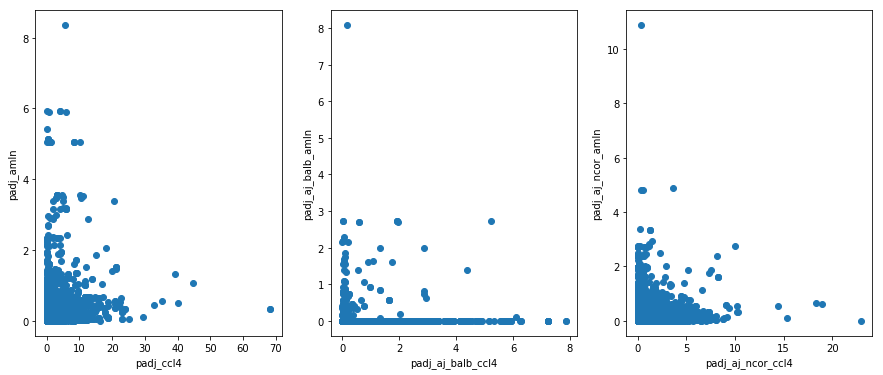

In [139]:
plot_pval_comp(aj_amln, aj_ccl4)

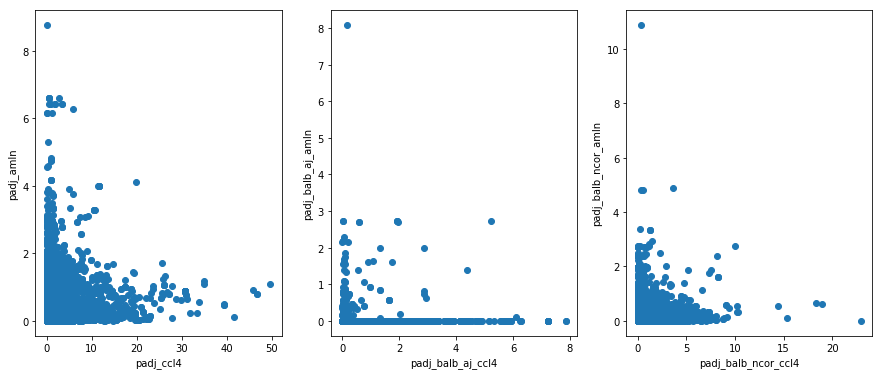

In [140]:
plot_pval_comp(balb_amln, balb_ccl4)

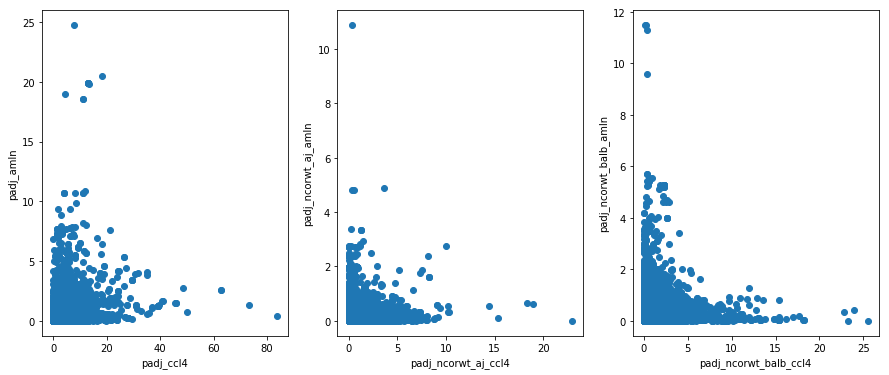

In [141]:
plot_pval_comp(ncorwt_amln, ncorwt_ccl4)

### Look at the overlap of significantly different samples

In [144]:
p_cols = list(aj_amln.columns[pd.Series(aj_amln.columns).str.contains('padj.*')])

In [145]:
df = aj_amln.merge(aj_ccl4, how='outer', on='Unnamed: 0', suffixes=('_amln', '_ccl4'))

In [147]:
def display_diet_overlap(amln, ccl4):
    

,Unnamed: 0,baseMean_amln,log2FoldChange_amln,lfcSE_amln,stat_amln,pvalue_amln,padj_amln,baseMean_aj_balb_amln,log2FoldChange_aj_balb_amln,lfcSE_aj_balb_amln,...,lfcSE_aj_balb_ccl4,stat_aj_balb_ccl4,pvalue_aj_balb_ccl4,padj_aj_balb_ccl4,baseMean_aj_ncor_ccl4,log2FoldChange_aj_ncor_ccl4,lfcSE_aj_ncor_ccl4,stat_aj_ncor_ccl4,pvalue_aj_ncor_ccl4,padj_aj_ncor_ccl4
0,NM_013484,2350.047653,-3.158356,0.428400,-7.372454,1.675155e-13,4.385389e-09,2350.047653,2.487031,0.604718,...,0.348837,-5.313849,1.073338e-07,0.000043,4386.823087,0.954082,0.333031,2.864846,0.004172,0.042848
1,NM_001347170,99.251683,-2.697066,0.419954,-6.422288,1.342411e-10,1.171432e-06,99.251683,1.860946,0.575207,...,0.521768,-2.010779,4.434882e-02,0.406878,335.774407,0.160743,0.499980,0.321498,0.747833,0.914830
2,NM_010441,99.251683,-2.697066,0.419954,-6.422288,1.342411e-10,1.171432e-06,99.251683,1.860946,0.575207,...,0.521768,-2.010779,4.434882e-02,0.406878,335.774407,0.160743,0.499980,0.321498,0.747833,0.914830
3,NM_009877,305.046799,-3.876227,0.608152,-6.373780,1.844253e-10,1.207018e-06,305.046799,0.502741,0.860020,...,0.809265,-0.132043,8.949502e-01,0.988929,41.572175,1.935641,0.740069,2.615486,0.008910,0.072886
4,NM_001040654,296.792017,-3.972554,0.627240,-6.333390,2.398318e-10,1.255711e-06,296.792017,0.480875,0.887116,...,1.011652,-0.831933,4.054468e-01,0.881940,32.359132,3.085267,0.925056,3.335223,0.000852,0.013494
